# Day 1 - Data foundations tutorial

***
Welcome to the tutorial on data foundations. This guide will walk you through some fundamental concepts and essential steps for data preparation, visualization, and feature engineering.
***

**_NOTE_**: This notebook has been tested in the following environment:

* Python version = 3.12.3

## Overview

***

### Table of Contents
- [Overview](#Overview)
- [Before you begin](#Before-you-begin)
- [Data](#Data)
- [Data preparation](#Data-preparation)
- [Data visualization](#Data-visualization)
- [Feature engineering](#Feature-engineering)

### Objective

In this tutorial, you will learn how to prepare your dataset for analysis by cleaning and transforming raw data, creating meaningful visualizations to uncover insights, and engineering features to enhance the performance of predictive models. The objective is to equip you with the skills needed to handle data effectively, make informed decisions, and build robust analytical solutions.

### Dataset

The example dataset (*nba.csv*) contains data about NBA players. This table includes player name, team, number, position, age, height, weight, college and salary.

### Some useful python functions
+ https://www.datacamp.com/community/tutorials/python-data-science-cheat-sheet-basics
+ https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

## Before you begin
[Return to Table of Contents](#Table-of-Contents)  
***

### Setup

The guide is structured in the following way:  

- Read the data
- Prepare your dataset
- Explore and understand your data with visualizations
- Add new features

### Import libraries

In [1]:
# Data preparation and insights
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature engineering
from sklearn.preprocessing import LabelEncoder

## Data
[Return to Table of Contents](#Table-of-Contents)  
***

### Read the data and look at the top rows

In [2]:
data = pd.read_csv('nba.csv')
data.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


### Summarise data

Gather some information about different columns in your DataFrame. You can do so by using `.info()`, which gives you information about the number of rows, columns, column data types, memory usage, etc.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


As you can see, columns like `Age`, `Weight` and `Salary` are read as floats.
The other columns with object are the possible categorical features in your dataset. We will talk about those a little bit later.

## Data preparation
[Return to Table of Contents](#Table-of-Contents)
***

Data preparation is the first step after you get your hands on any kind of dataset. This is the step when you pre-process raw data into a form that can be easily and accurately analyzed. Proper data preparation allows for efficient analysis - it can eliminate errors and inaccuracies that could have occurred during the data gathering process and can thus help in removing some bias resulting from poor data quality. Therefore a lot of an analyst's time is spent on this vital step.

### Missing data

Missing data can arise in the dataset due to multiple reasons: the data for the specific field was not added by the user/data collection application, data was lost while transferring manually, a programming error, etc. It is sometimes essential to understand the cause because this will influence how you deal with such data. So that would be the first step in data preperation - understand if you have any missing data, why it is missing and should I transform data do replace/remove these missing values.


Let's investigate null values in the dataset. This can be done by using `isnull()` function.

In [4]:
# what isnull() does?
data.isnull()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
453,False,False,False,False,False,False,False,False,False
454,False,False,False,False,False,False,False,True,False
455,False,False,False,False,False,False,False,True,False
456,False,False,False,False,False,False,False,False,False


Get the number of null values in a dataframe columnwise:

In [ ]:
data.isnull().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [6]:
data.isna().any()

,0
Name,True
Team,True
Number,True
Position,True
Age,True
Height,True
Weight,True
College,True
Salary,True


Get the number of null values in a specific column:

In [7]:
data['Salary'].isnull().sum()

np.int64(12)

Get number of nulls in the entire dataframe:

In [9]:
data.isnull().values.sum()

np.int64(104)

Let's print out all data with missing values

In [10]:
# entry in square brackets represents a condition

null_data = data[data.isnull().any(axis=1)]
null_data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
5,Amir Johnson,Boston Celtics,90.0,PF,29.0,6-9,240.0,NaN,12000000.0
15,Bojan Bogdanovic,Brooklyn Nets,44.0,SG,27.0,6-8,216.0,NaN,3425510.0
20,Sergey Karasev,Brooklyn Nets,10.0,SG,22.0,6-7,208.0,NaN,1599840.0
...,...,...,...,...,...,...,...,...,...
447,Rudy Gobert,Utah Jazz,27.0,C,23.0,7-1,245.0,NaN,1175880.0
450,Joe Ingles,Utah Jazz,2.0,SF,28.0,6-8,226.0,NaN,2050000.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0


We can see that one row is with all missing values, that we can drop completely.

In [11]:
data = data.dropna(how = 'all')
data.isnull().sum()

,0
Name,0
Team,0
Number,0
Position,0
Age,0
Height,0
Weight,0
College,84
Salary,11


There’s no single correct approach on handling missing data, it depends on the context, but for the sake of practice let's fill the missing values for `Salary`.

In [12]:
data1 = data.copy()
data1['Salary'] = data1['Salary'].fillna(0)
data1.isnull().sum()

,0
Name,0
Team,0
Number,0
Position,0
Age,0
Height,0
Weight,0
College,84
Salary,0


In [23]:
data2 = data.copy()
data2['Salary'] = data2['Salary'].fillna(data2['Salary'].median())
data2.isnull().sum()

,0
Name,0
Team,0
Number,0
Position,0
Age,0
Height,0
Weight,0
College,84
Salary,0


In [24]:
data2['College'] = data2['College'].fillna(data2['College'].mode()[0])
data2.isnull().sum()

,0
Name,0
Team,0
Number,0
Position,0
Age,0
Height,0
Weight,0
College,0
Salary,11


Sometimes, it's beneficial to leave missing values as they are. Certain algorithms can handle missing data directly, and in some cases, the missing data itself may carry valuable information.

Other rows with `NaN` values leave as it is for now.

### Statistical overview of data

Pandas has an in-built function which generates desciptive statistics of given Data Frame. Use this function to have a sense of data set.

In [13]:
# descriptive statistics of data
data.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


Let's check how many players are in each team. We will group data and use some descriptive statistics.
Grouping is used together with the functions, either built-in (`size()`, `max()`, `min()`, etc., see more here https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#splitting-an-object-into-groups) or custom user defined functions.

In [ ]:
data.groupby('Team').size().reset_index(name='count')

,Team,count
0,Atlanta Hawks,15
1,Boston Celtics,15
2,Brooklyn Nets,15
3,Charlotte Hornets,15
4,Chicago Bulls,15
5,Cleveland Cavaliers,15
6,Dallas Mavericks,15
7,Denver Nuggets,15
8,Detroit Pistons,15
9,Golden State Warriors,15


Calculate average age and salary in each team. Order by salary (biggest to smallest)

In [16]:
df_mean = data.groupby('Team')[['Age', 'Salary']].mean().round(2)
df_mean.sort_values('Salary', ascending=False)

,Age,Salary
Team,,
Cleveland Cavaliers,29.53,7642049.21
Miami Heat,28.93,6347359.46
Los Angeles Clippers,29.47,6323642.67
Oklahoma City Thunder,27.07,6251019.87
Golden State Warriors,27.67,5924599.80
Chicago Bulls,27.40,5785558.53
San Antonio Spurs,31.60,5629515.53
Memphis Grizzlies,28.39,5467920.00
Charlotte Hornets,26.13,5222728.00


Calculate median age and salary in each team and sort by age.

In [17]:
df_median = data.groupby('Team')[['Age', 'Salary']].median()
df_median.sort_values('Salary', ascending=False)

,Age,Salary
Team,,
Cleveland Cavaliers,30.0,4975000.0
Memphis Grizzlies,28.0,4544009.5
Charlotte Hornets,27.0,4204200.0
Indiana Pacers,27.0,4000000.0
Washington Wizards,29.0,4000000.0
Orlando Magic,24.5,3956580.0
Dallas Mavericks,31.0,3950313.0
Golden State Warriors,28.0,3815000.0
Oklahoma City Thunder,26.0,3344000.0


Join these two tables together.
To join in pandas, use `merge()` - define dataframes to merge, how to merge, on which column(s). Try to avoid column names overlapping - use suffixes or rename columns before merging.

In [22]:
# option 1
pd.merge(df_mean,df_median,on='Team', suffixes = ('_mean', '_median')).sort_values('Team')

,Age_mean,Salary_mean,Age_median,Salary_median
Team,,,,
Atlanta Hawks,28.20,4860196.67,27.0,2854940.0
Boston Celtics,24.73,4181504.86,25.0,3021242.5
Brooklyn Nets,25.60,3501898.33,26.0,1335480.0
Charlotte Hornets,26.13,5222728.00,27.0,4204200.0
Chicago Bulls,27.40,5785558.53,27.0,2380440.0
Cleveland Cavaliers,29.53,7642049.21,30.0,4975000.0
Dallas Mavericks,29.73,4746582.13,31.0,3950313.0
Denver Nuggets,25.73,4294423.57,25.0,2907000.0
Detroit Pistons,26.20,4477884.20,25.0,2891760.0


In [ ]:
# option 2
age_salary_df = df_mean.merge(df_median, on='Team', suffixes = ('_mean', '_median')).sort_values('Team')
age_salary_df

,Age_mean,Salary_mean,Age_median,Salary_median
Team,,,,
Atlanta Hawks,28.200000,4.860197e+06,27.0,2854940.0
Boston Celtics,24.733333,4.181505e+06,25.0,3021242.5
Brooklyn Nets,25.600000,3.501898e+06,26.0,1335480.0
Charlotte Hornets,26.133333,5.222728e+06,27.0,4204200.0
Chicago Bulls,27.400000,5.785559e+06,27.0,2380440.0
Cleveland Cavaliers,29.533333,7.642049e+06,30.0,4975000.0
Dallas Mavericks,29.733333,4.746582e+06,31.0,3950313.0
Denver Nuggets,25.733333,4.294424e+06,25.0,2907000.0
Detroit Pistons,26.200000,4.477884e+06,25.0,2891760.0


### Skewness

We can notice that for some features mean value is much greater than median which leads to a thought of skewed distribution in data. If difference between mean and median is significant, we will substitue values in `data_merged` with
* string value '`left`' if the mean is smaller than the median,
* string value '`right`' if the mean is bigger than the median.

Quick illustrative example of right and left skewness. [The Effect of Skew on the Mean and Median](http://davidmlane.com/hyperstat/A92403.html)

Here with significant difference we understand situation when median is more than 10% bigger than mean, where
$$ \text{Percentage Difference betwen two values}(x,y) = \frac{|x - y|}{\frac{x+y}{2}} \times 100 $$


In [ ]:
# Start with creating a function which calculates percentage difference between DataFrame values.
def perc_diff(x,y):
    return 100.0*np.absolute(x-y)/((x+y)/2.0)

# define conditions for right and left skewness
left_mask = ((age_salary_df['Salary_mean'] < age_salary_df['Salary_median']) & (perc_diff(age_salary_df['Salary_mean'],age_salary_df['Salary_median']) > 10))
right_mask = ((age_salary_df['Salary_mean'] > age_salary_df['Salary_median']) & (perc_diff(age_salary_df['Salary_mean'],age_salary_df['Salary_median']) > 10))

age_salary_df.loc[left_mask, 'Skewness'] = 'left'
age_salary_df.loc[right_mask, 'Skewness'] = 'right'

age_salary_df

,Age_mean,Salary_mean,Age_median,Salary_median,Skewness
Team,,,,,
Atlanta Hawks,28.200000,4.860197e+06,27.0,2854940.0,right
Boston Celtics,24.733333,4.181505e+06,25.0,3021242.5,right
Brooklyn Nets,25.600000,3.501898e+06,26.0,1335480.0,right
Charlotte Hornets,26.133333,5.222728e+06,27.0,4204200.0,right
Chicago Bulls,27.400000,5.785559e+06,27.0,2380440.0,right
Cleveland Cavaliers,29.533333,7.642049e+06,30.0,4975000.0,right
Dallas Mavericks,29.733333,4.746582e+06,31.0,3950313.0,right
Denver Nuggets,25.733333,4.294424e+06,25.0,2907000.0,right
Detroit Pistons,26.200000,4.477884e+06,25.0,2891760.0,right


In [ ]:
perc_diff(age_salary_df['Salary_mean'],age_salary_df['Salary_median'])

Team
Atlanta Hawks             51.982402
Boston Celtics            32.217217
Brooklyn Nets             89.569936
Charlotte Hornets         21.608906
Chicago Bulls             83.397481
Cleveland Cavaliers       42.276909
Dallas Mavericks          18.311573
Denver Nuggets            38.531925
Detroit Pistons           43.044797
Golden State Warriors     43.320051
Houston Rockets           74.740270
Indiana Pacers            10.653615
Los Angeles Clippers      68.108910
Los Angeles Lakers        94.038134
Memphis Grizzlies         18.456193
Miami Heat                87.566082
Milwaukee Bucks           63.474562
Minnesota Timberwolves    72.527626
New Orleans Pelicans      41.783217
New York Knicks           69.225861
Oklahoma City Thunder     60.594348
Orlando Magic              8.254785
Philadelphia 76ers        72.392701
Phoenix Suns              69.803251
Portland Trail Blazers    12.022305
Sacramento Kings          40.887375
San Antonio Spurs         66.690599
Toronto Raptors        

We can see that for a lot of teams salary data is right skewed, that means, there are multiple players that have bigger salary than majority of other players

Let's see min and max salaries in each team.

In [ ]:
data.groupby(["Team", "Age"])[['Salary']].max().head(30)

Salary
Team              Age             
Atlanta Hawks     22.0   1763400.0
                  24.0   1304520.0
                  26.0   2000000.0
                  27.0   8000000.0
                  30.0  12000000.0
                  31.0  18671659.0
                  32.0   4000000.0
                  35.0   5746479.0
Boston Celtics    20.0   1749840.0
                  21.0   1170960.0
                  22.0   3431040.0
                  24.0   2569260.0
                  25.0   7730337.0
                  26.0   2616975.0
                  27.0   6912869.0
                  29.0  12000000.0
Brooklyn Nets     21.0   1335480.0
                  22.0   1599840.0
                  23.0   1500000.0
                  24.0    845059.0
                  25.0    981348.0
                  26.0    947276.0
                  27.0  11235955.0
                  28.0  19689000.0
                  32.0   6300000.0
Charlotte Hornets 21.0    525093.0
                  22.0   6331404.0
                  23.0   4204200.0
                  24.0   3034356.0
                  26.0  12000000.0

In [ ]:
data.groupby(["Team", "Age"])[['Salary']].min().head(30)

Salary
Team              Age             
Atlanta Hawks     22.0   1763400.0
                  24.0    525093.0
                  26.0   2000000.0
                  27.0   3333333.0
                  30.0  12000000.0
                  31.0   1000000.0
                  32.0   4000000.0
                  35.0   2854940.0
Boston Celtics    20.0   1749840.0
                  21.0   1170960.0
                  22.0   1148640.0
                  24.0   2569260.0
                  25.0   2165160.0
                  26.0   2616975.0
                  27.0   3425510.0
                  29.0   5000000.0
Brooklyn Nets     21.0   1140240.0
                  22.0   1599840.0
                  23.0   1500000.0
                  24.0    845059.0
                  25.0    981348.0
                  26.0    134215.0
                  27.0   3425510.0
                  28.0    947276.0
                  32.0   6300000.0
Charlotte Hornets 21.0    525093.0
                  22.0   6331404.0
                  23.0   2612520.0
                  24.0    947276.0
                  26.0  12000000.0

First thing that we can notice is that smaller salaries are for younger players, but bigger for older. Let's see if there is any correlation between them.

### Correlation
(*Pearson*) correlation coefficient is a measure of the linear correlation between two variables X and Y. It has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation. Value of 0.7 and higher (-0.7 and lower) is considered as strong correlation. In other words, it’s a measure of how things are related.

<img src="https://ars.els-cdn.com/content/image/3-s2.0-B9780124016903000032-f03-41-9780124016903.jpg" />
<p style="text-align:center"> https://www.sciencedirect.com/science/article/pii/B9780124016903000032 </p>

Diagonal in the correlation matrix always will be 1 as attribute is always positive correlated to itself. Correlation matrix also is symetrical because correlation between X and Y is the same as correlation between Y and X.

In [30]:
# Calculate correlation matrix
corr = data.select_dtypes(include=['number']).corr()
corr

,Number,Age,Weight,Salary
Number,1.000000,0.028724,0.206921,-0.112386
Age,0.028724,1.000000,0.087183,0.213459
Weight,0.206921,0.087183,1.000000,0.138321
Salary,-0.112386,0.213459,0.138321,1.000000


Correlation coefficient between age and salary is 0.21, so there is some correlation, but it isn't strong.

### Outliers

Outliers are data points that deviate significantly from other data points in a dataset. They can arise from a variety of factors such as measurement errors, rare events or natural variations in the data. If left unchecked it can distort data analysis, skew statistical results and impact machine learning model performance.

This code identifies the first and last 5% of data outliers in a given column. It calculates the 5th percentile (values below which the first 5% of data lies) and the 95th percentile (values above which the last 5% of data lies). Any values below the 5th percentile are considered the first 5% of outliers, while values above the 95th percentile are considered the last 5% of outliers. The code then outputs these outliers for further analysis.

In [31]:
salary = data['Salary']

lower_threshold = salary.quantile(0.05)  # 5th percentile
lower_outliers = pd.DataFrame(salary[salary < lower_threshold])  # Below 5th percentile
lower_outliers

,Salary
21,134215.0
32,30888.0
45,167406.0
73,245177.0
90,289755.0
92,111444.0
123,206192.0
130,55722.0
135,83397.0
175,111196.0


In [32]:
upper_threshold = salary.quantile(0.95)  # 95th percentile
upper_outliers = pd.DataFrame(salary[salary > upper_threshold])  # Above 95th percentile
upper_outliers

,Salary
23,19689000.0
33,22875000.0
96,18907726.0
98,19689000.0
100,21468695.0
109,25000000.0
164,20093064.0
168,16407501.0
169,22970500.0
174,19689000.0


### Data scaling

It’s possible that you will come across datasets with lots of numerical noise built-in, such as variance or differently-scaled data, so a good preprocessing is a must before even thinking about machine learning. A good preprocessing solution for this type of problem is often referred to as standardization.

Standardization is a preprocessing method used to transform continuous data to make it look normally distributed. In `scikit-learn` this is often a necessary step because many models assume that the data you are training on is normally distributed, and if it isn't, your risk biasing your model.

A value is standardized as follows:

$\large x_{norm} = \frac{(x – mean)}{sd}$


Where the mean is calculated as:

$\large mean = \frac{\sum(x)}{count(x)}$

And the standard deviation (sd) is calculated as:

$\large sd = \sqrt( \frac{\sum( (x – mean)^2 )}{count(x)})$


In [33]:
# For this example we will create a dataframe with 4 rows and 4 columns (4*4 matrix)
data_dim = pd.DataFrame([[1,2,0.7,100],[4,5,0.2,200],[3,5,0.33,300],[6,1,0.1,400]])
data_dim

,0,1,2,3
0,1,2,0.70,100
1,4,5,0.20,200
2,3,5,0.33,300
3,6,1,0.10,400


We can see that the max of columns are 6, 5, 0.7 an 400. There are huge differences between the values, and a machine learning model could here easily interpret column 3 as the most important attribute, due to larger scale.

In [ ]:
# Import StandardScaler and create an instance of it
from sklearn.preprocessing import StandardScaler

# create the scaler
scaler = StandardScaler()

# apply the scaler to the dataframe subset
data_scaled = scaler.fit_transform(data_dim)
data_scaled

array([[-1.38675049, -0.70014004,  1.61675185, -1.34164079],
       [ 0.2773501 ,  0.98019606, -0.58291053, -0.4472136 ],
       [-0.2773501 ,  0.98019606, -0.01099831,  0.4472136 ],
       [ 1.38675049, -1.26025208, -1.02284301,  1.34164079]])

#### Normalization

Normalization, also known as Min-Max Scaling, transforms data to fit within a specific range, typically between 0 and 1. The function that can be used for data normalization is `MinMaxScaler`. The formula for that is:

$\Large x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
data_scaled = scaler.fit_transform(data_dim)
data_scaled

array([[0.        , 0.25      , 1.        , 0.        ],
       [0.6       , 1.        , 0.16666667, 0.33333333],
       [0.4       , 1.        , 0.38333333, 0.66666667],
       [1.        , 0.        , 0.        , 1.        ]])

### Categorical data

There can also be categorical features in many datasets. These generally include different categories or levels associated with the observation, which are non-numerical and thus need to be converted so the computer can process them.

Categorical features can only take on a limited, and usually fixed, number of possible values. For example, if a dataset is about information related to users, then you will typically find features like country, gender, age group, etc. Alternatively, if the data you're working with is related to products, you will find features like product type, manufacturer, seller and so on.

These are all categorical features in your dataset. These features are typically stored as text values which represent various traits of the observations. For example, gender is described as Male (M) or Female (F), product type could be described as electronics, apparels, food etc.

**Note** that these type of features where the categories are only labeled without any order of precedence are called nominal features. Features which have some order associated with them are called ordinal features. For example, a feature like economic status, with three categories: low, medium and high, which have an order associated with them.

There are also continuous features. These are numeric variables that have an infinite number of values between any two values. A continuous variable can be numeric or a date/time.

Regardless of what the value is used for, the challenge is determining how to use this data in the analysis because of the following constraints:

+ Categorical features may have a very large number of levels, known as high cardinality, (for example, cities or URLs), where most of the levels appear in a relatively small number of instances.
+ Many machine learning models, such as regression or SVM, are algebraic. This means that their input must be numerical. To use these models, categories must be transformed into numbers first, before you can apply the learning algorithm on them.
+ While some ML packages or libraries might transform categorical data to numeric automatically based on some default embedding method, many other ML packages don’t support such inputs.
+ For the machine, categorical data doesn’t contain the same context or information that humans can easily associate and understand. For example, when looking at a feature called City with three cities New York, New Jersey and New Delhi, humans can infer that New York is closely related to New Jersey as they are from same country, while New York and New Delhi are much different. But for the model, New York, New Jersey and New Delhi, are just three different levels (possible values) of the same feature City. If you don’t specify the additional contextual information, it will be impossible for the model to differentiate between highly different levels.

In [34]:
cat_data = data.select_dtypes(include=['object']).copy()
cat_data

,Name,Team,Position,Height,College
0,Avery Bradley,Boston Celtics,PG,6-2,Texas
1,Jae Crowder,Boston Celtics,SF,6-6,Marquette
2,John Holland,Boston Celtics,SG,6-5,Boston University
3,R.J. Hunter,Boston Celtics,SG,6-5,Georgia State
4,Jonas Jerebko,Boston Celtics,PF,6-10,NaN
...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,PF,6-10,Kentucky
453,Shelvin Mack,Utah Jazz,PG,6-3,Butler
454,Raul Neto,Utah Jazz,PG,6-1,NaN
455,Tibor Pleiss,Utah Jazz,C,7-3,NaN


Also for categorical data it is worthy to check missing values and replace them if necessery:

In [35]:
cat_data.isnull().sum()

,0
Name,0
Team,0
Position,0
Height,0
College,84


As already saw before - we have missing values for College column. I will show one way how to replace missing values with mode, but we won't be applying that to the original dataset.  The function `fillna()` is handy for such operations.

Note the chaining of method `.value_counts()` in the code below. This returns the frequency distribution of each category in the feature, and then selecting the top category, which is the mode, with the `.index` attribute.

In [36]:
cat_data['College'].value_counts()

,count
College,
Kentucky,22
Duke,20
Kansas,18
North Carolina,16
UCLA,15
...,...
Morehead State,1
Weber State,1
Central Michigan,1


In [37]:
cat_data_copy = cat_data.fillna(cat_data['College'].value_counts().index[0])
cat_data_copy

,Name,Team,Position,Height,College
0,Avery Bradley,Boston Celtics,PG,6-2,Texas
1,Jae Crowder,Boston Celtics,SF,6-6,Marquette
2,John Holland,Boston Celtics,SG,6-5,Boston University
3,R.J. Hunter,Boston Celtics,SG,6-5,Georgia State
4,Jonas Jerebko,Boston Celtics,PF,6-10,Kentucky
...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,PF,6-10,Kentucky
453,Shelvin Mack,Utah Jazz,PG,6-3,Butler
454,Raul Neto,Utah Jazz,PG,6-1,Kentucky
455,Tibor Pleiss,Utah Jazz,C,7-3,Kentucky


Let's check the number of null values after imputation should result in a zero count.

In [38]:
cat_data_copy.isnull().values.sum()

np.int64(0)

Another Exploratory Data Analysis (EDA) step that you might want to do on categorical features is the frequency distribution of categories within the feature, which can be done with the `.value_counts()` method as described earlier.

In [39]:
cat_data['Position'].value_counts()

,count
Position,
SG,102
PF,100
PG,92
SF,85
C,78


To know the count of distinct categories within the feature you can chain the previous code with the `.count()` or `.nunique()` method:

In [40]:
cat_data['Position'].value_counts().count()

np.int64(5)

In [41]:
cat_data['Position'].nunique()

5

### Reshape wide to long

It can be useful sometimes to reshape your data. Depending on the task, it can be easier to do things.

Reshaping a data from wide to long in `pandas` python is done with `melt()` function. `melt` function in pandas is one of the efficient function to transform the data from wide to long format.

The data that we have now is in wide format.

<img src = 'https://www.datasciencemadesimple.com/wp-content/uploads/2017/11/Reshape-wide-to-long-in-pandas-python-with-melt-function-0.png?ezimgfmt=ng:webp/ngcb1'>

In [44]:
data.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [45]:
# shape from wide to long with melt function in pandas
data2=pd.melt(data,id_vars=['Name'],var_name='metrics', value_name='values')
data2.head()

,Name,metrics,values
0,Avery Bradley,Team,Boston Celtics
1,Jae Crowder,Team,Boston Celtics
2,John Holland,Team,Boston Celtics
3,R.J. Hunter,Team,Boston Celtics
4,Jonas Jerebko,Team,Boston Celtics


In [46]:
data2['metrics'].unique()

array(['Team', 'Number', 'Position', 'Age', 'Height', 'Weight', 'College',
       'Salary'], dtype=object)

In [47]:
data2=pd.melt(data,id_vars=['Name', 'Number'],var_name='metrics', value_name='value')
data2.head()

,Name,Number,metrics,value
0,Avery Bradley,0.0,Team,Boston Celtics
1,Jae Crowder,99.0,Team,Boston Celtics
2,John Holland,30.0,Team,Boston Celtics
3,R.J. Hunter,28.0,Team,Boston Celtics
4,Jonas Jerebko,8.0,Team,Boston Celtics


In [ ]:
data2[data2['Name'] == 'Avery Bradley']

,Name,Number,metrics,value
0,Avery Bradley,0.0,Team,Boston Celtics
457,Avery Bradley,0.0,Position,PG
914,Avery Bradley,0.0,Age,25.0
1371,Avery Bradley,0.0,Height,6-2
1828,Avery Bradley,0.0,Weight,180.0
2285,Avery Bradley,0.0,College,Texas
2742,Avery Bradley,0.0,Salary,7730337.0


Reshape it back to wide format

In [48]:
data2.pivot_table(index=["Name","Number"], columns='metrics', values='value', aggfunc='first').reset_index()

metrics,Name,Number,Age,College,Height,Position,Salary,Team,Weight
0,Aaron Brooks,0.0,31.0,Oregon,6-0,PG,2250000.0,Chicago Bulls,161.0
1,Aaron Gordon,0.0,20.0,Arizona,6-9,PF,4171680.0,Orlando Magic,220.0
2,Aaron Harrison,9.0,21.0,Kentucky,6-6,SG,525093.0,Charlotte Hornets,210.0
3,Adreian Payne,33.0,25.0,Michigan State,6-10,PF,1938840.0,Minnesota Timberwolves,237.0
4,Al Horford,15.0,30.0,Florida,6-10,C,12000000.0,Atlanta Hawks,245.0
...,...,...,...,...,...,...,...,...,...
452,Wilson Chandler,21.0,29.0,DePaul,6-8,SF,10449438.0,Denver Nuggets,225.0
453,Xavier Munford,14.0,24.0,Rhode Island,6-3,PG,NaN,Memphis Grizzlies,180.0
454,Zach LaVine,8.0,21.0,UCLA,6-5,PG,2148360.0,Minnesota Timberwolves,189.0
455,Zach Randolph,50.0,34.0,Michigan State,6-9,PF,9638555.0,Memphis Grizzlies,260.0


With `aggfunc='first'`, each (Name , Number) group is aggregrated by taking the first value found. There shoudn't be any duplicates, so the first value is the same as the only value.

### Data partitioning for cross-validation

Cross-validation is primarily used to evaluate how well a machine learning model will perform on independent data that it has not seen before. We'll consider two data split methods in this tutorial.
- **Holdout method:** Dataset is split once, typically into training and testing sets.
- **K-Fold cross-validation:** Dataset is divided into k folds and each fold is used once as test set.

Lets assume that the `Salary` is our target variable and numerical values `Number`, `Age` and `Weight` will represent the independent variables.

In [49]:
X = data[['Number', 'Age', 'Weight']] # independent variables
y = data['Salary'] # target variable

In [50]:
# Data split for holdout method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
print("Original row count:", len(data))
print("Training dataset row count:", len(X_train))
print("Test dataset row count:", len(X_test))

Original row count: 457
Training dataset row count: 365
Test dataset row count: 92


In [53]:
# Data split for k-fold cv
# Number of folds
k = 5
# Initialize KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [56]:
# You can check each fold this way
fold = 1
for train_index, test_index in kf.split(X):
    # Use .iloc for integer-based indexing
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Fold {fold}:")
    print(f"X_train:\n{X_train}")
    print(f"y_train:\n{y_train}")
    print(f"X_test:\n{X_test}")
    print(f"y_test:\n{y_test}")
    print()
    fold += 1

Fold 1:
X_train:
     Number   Age  Weight
1      99.0  25.0   235.0
2      30.0  27.0   205.0
3      28.0  22.0   185.0
4       8.0  29.0   231.0
5      90.0  29.0   240.0
..      ...   ...     ...
450     2.0  28.0   226.0
453     8.0  26.0   203.0
454    25.0  24.0   179.0
455    21.0  26.0   256.0
456    24.0  26.0   231.0

[365 rows x 3 columns]
y_train:
1       6796117.0
2             NaN
3       1148640.0
4       5000000.0
5      12000000.0
          ...    
450     2050000.0
453     2433333.0
454      900000.0
455     2900000.0
456      947276.0
Name: Salary, Length: 365, dtype: float64
X_test:
     Number   Age  Weight
0       0.0  25.0   180.0
9      36.0  22.0   220.0
11      4.0  27.0   185.0
15     44.0  27.0   216.0
19      2.0  32.0   200.0
..      ...   ...     ...
444    10.0  24.0   214.0
447    27.0  23.0   245.0
448    20.0  26.0   226.0
451    23.0  26.0   206.0
452    41.0  20.0   234.0

[92 rows x 3 columns]
y_test:
0       7730337.0
9       3431040.0
11      691

After that these folds can be used to perform cross-validation with an existing model:

`scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')`

## Data visualization
[Return to Table of Contents](#Table-of-Contents)
***

Data visualization is the graphical representation of information and data using visual elements like charts, graphs, and maps. It transforms complex data sets into visual formats that are easier for the human brain to comprehend, making data more accessible and actionable.

There are three most common ways to visualize data in Python:
 * Pandas built-in functions
 * Matplotlib library
 * Seaborn library

Often these are used in combination.

In [57]:
# set_theme() is a function from the Seaborn library used to set the visual theme for plots
sns.set_theme()

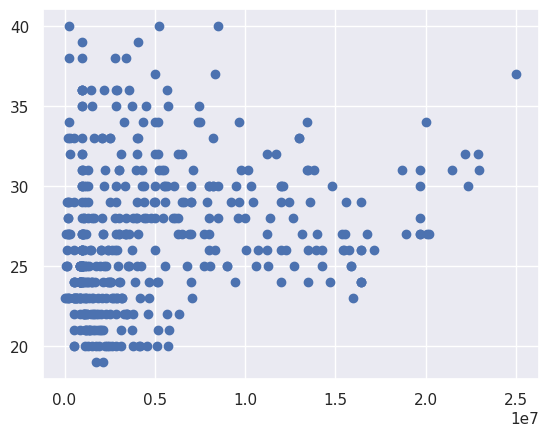

In [58]:
plt.scatter(data['Salary'], data['Age'])

### Plotting (and subplotting) samples
Some basics of plotting in python - subplots() without arguments returns a Figure and a single Axes, which we can unpack using the syntax bellow.

Text(0.5, 0.98, 'A single ax with no data')

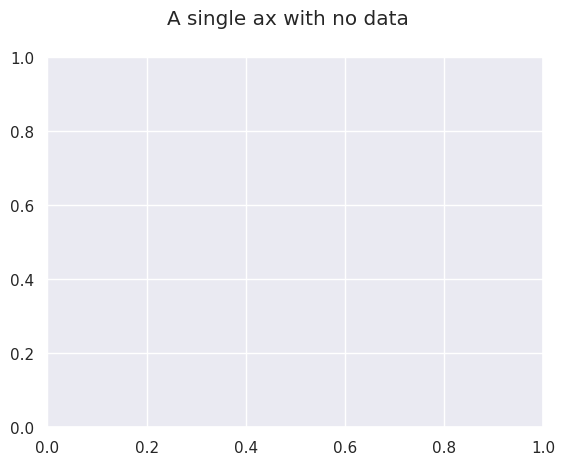

In [59]:
fig, ax = plt.subplots()
fig.suptitle('A single ax with no data')

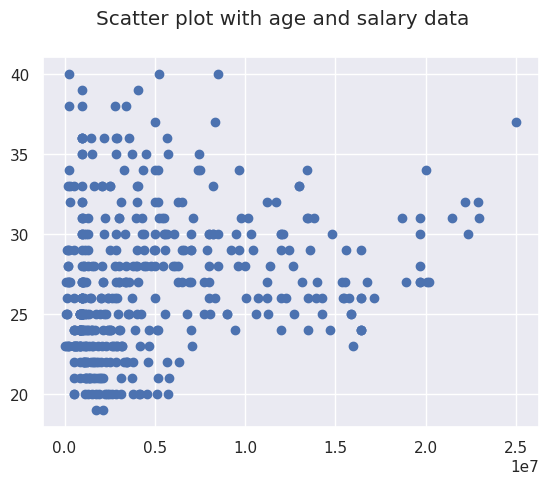

In [60]:
fig, ax = plt.subplots()
fig.suptitle('Scatter plot with age and salary data')
ax = plt.scatter(data['Salary'], data['Age'])

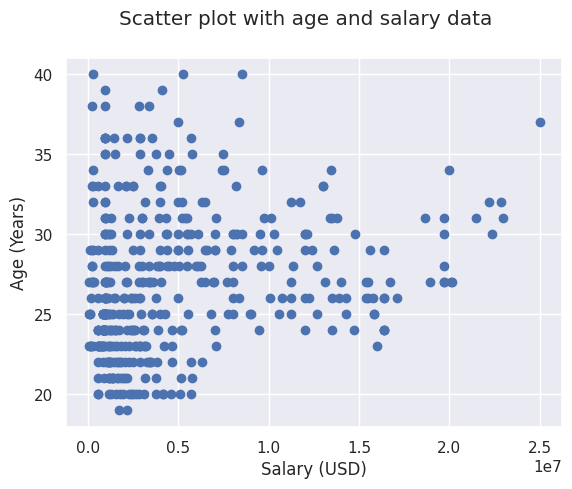

In [61]:
fig, ax = plt.subplots()
fig.suptitle('Scatter plot with age and salary data')
ax.set(xlabel='Salary (USD)', ylabel='Age (Years)')
plt.scatter(data['Salary'], data['Age'])

Thus, we can give two arguments to subplots functions: nrows and ncols. If given in that order, we don't need to type the arg names, just its values. In our example we create a plot with 1 row and 2 columns, still no data passed.

Text(0.5, 0.98, '1 row x 2 columns axes with no data')

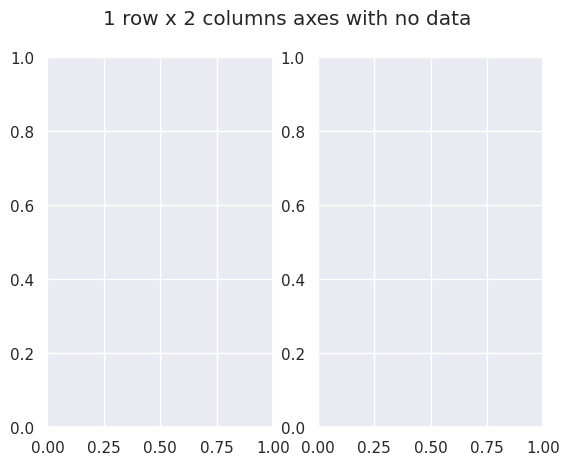

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.suptitle('1 row x 2 columns axes with no data')


Now `axes` is an array of AxesSubplot, so we can access each ax separetely and set a different title, for instance.

More arguments:

+ `figsize` set the total dimension of our figure
+ `sharex`and `sharey` are used to share one or both axes between the charts (needed data to work)

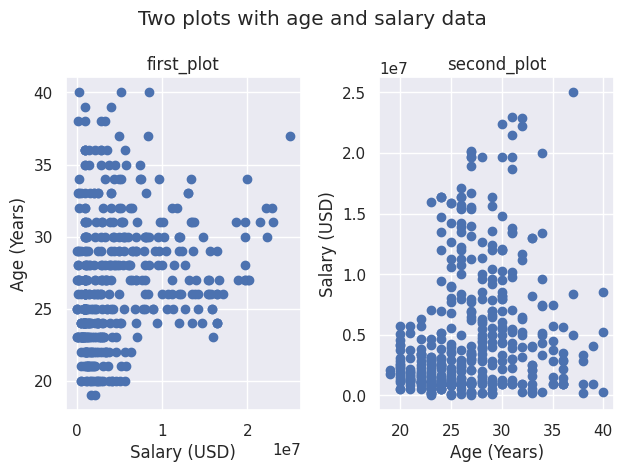

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.suptitle('Two plots with age and salary data')
axes[0].set(xlabel='Salary (USD)', ylabel='Age (Years)')
axes[1].set(xlabel='Age (Years)', ylabel='Salary (USD)')
axes[0].scatter(data['Salary'], data['Age'])
axes[0].set_title('first_plot')
axes[1].scatter(data['Age'], data['Salary'])
axes[1].set_title('second_plot')
plt.tight_layout()

Text(0.5, 1.0, 'Title of the first chart')

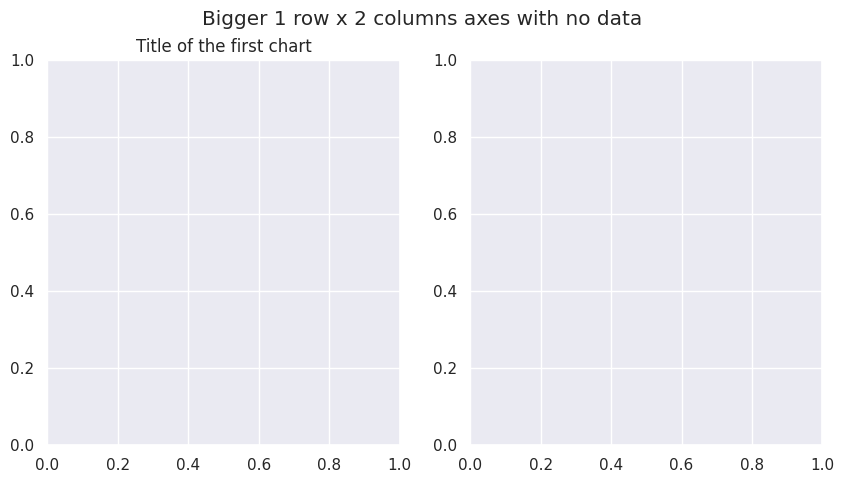

In [64]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Bigger 1 row x 2 columns axes with no data')
axes[0].set_title('Title of the first chart')

An so on

Text(0.5, 0.98, '3 rows x 4 columns axes with no data')

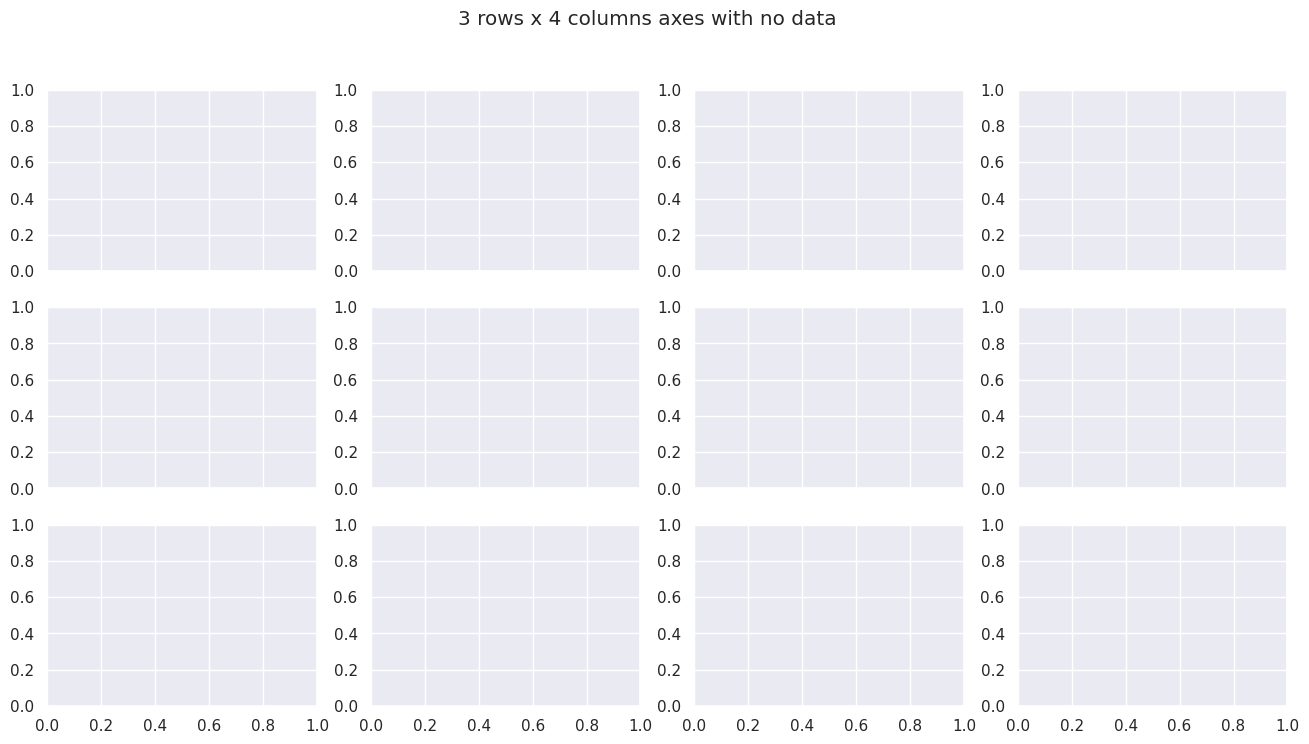

In [65]:
fig, axes = plt.subplots(3, 4, sharex=True, figsize=(16,8))
fig.suptitle('3 rows x 4 columns axes with no data')

This will be useful when we one to plot multiple plots side by side. For one plot it is good to know, bot not necessary.

### Histograms and density plots

To create a histogram, first, we divide the entire range of values into a series of intervals, and second, we count how many values fall into each interval. The intervals are also called bins.


The easiest way to take a look at the distribution of a numerical variable is to plot its histogram using the DataFrame's method `hist()`.

<Axes: >

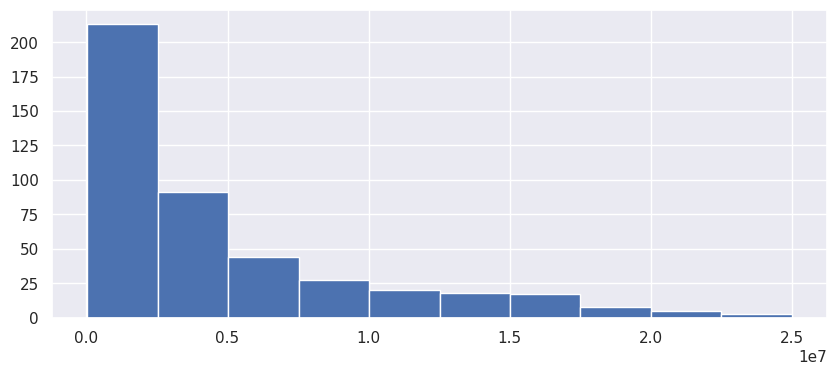

In [66]:
data['Salary'].hist(figsize=(10, 4))

<Axes: >

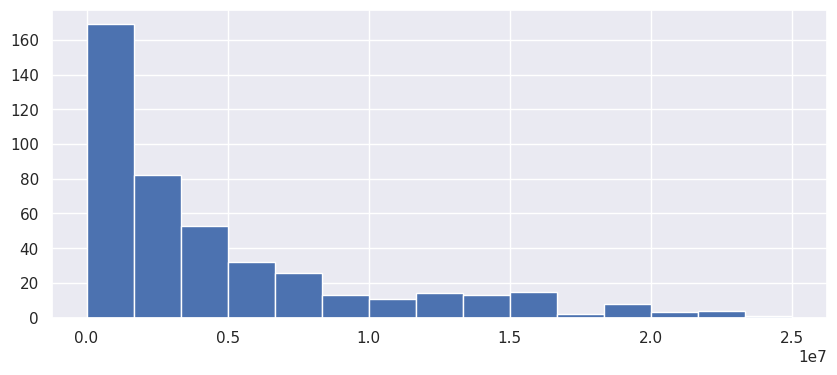

In [67]:
data['Salary'].hist(bins=15, figsize=(10, 4))

A histogram groups values into bins of equal value range. The shape of the histogram may contain clues about the underlying distribution type: Gaussian, exponential etc. You can also spot any skewness in its shape when the distribution is nearly regular but has some anomalies. Knowing the distribution of the feature values becomes important when you use Machine Learning methods that assume a particular type of it, most often Gaussian.

In the above plot, we see that the variable 'Salary' is prominently skewed right (its tail is longer on the right).

There is also another, often clearer, way to grasp the distribution: density plots or, more formally, Kernel Density Plots. They can be considered a smoothed version of the histogram. Their main advantage over the latter is that they do not depend on the size of the bins. Let's create density plots for the Salary and age variables:

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

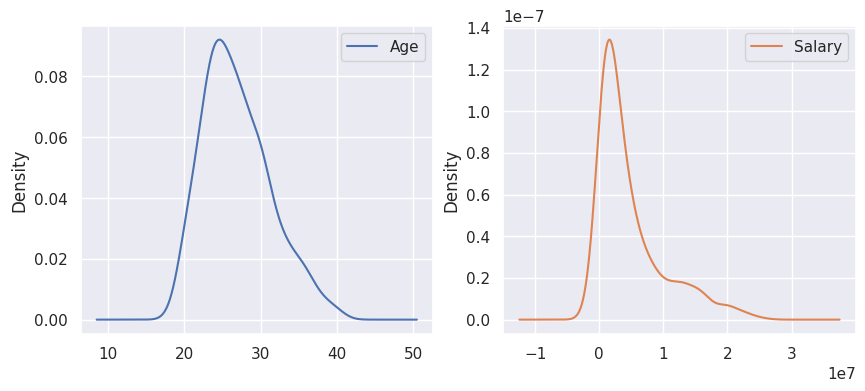

In [68]:
features = ['Age','Salary']
data[features].plot(kind='density', subplots=True, layout=(1, 2),
                  sharex=False, figsize=(10, 4))

It is also possible to plot a distribution of observations with seaborn's `histplot()`. For example, let's look at the distribution of 'Salary'. By default, the plot displays both the histogram with the kernel density estimate (KDE) on top.

<Axes: xlabel='Salary', ylabel='Count'>

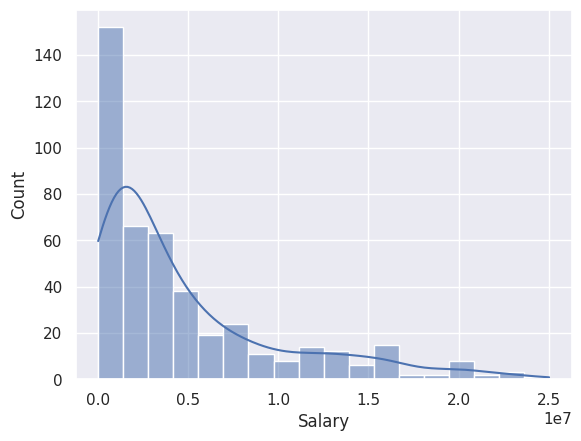

In [69]:
# we have to drop missing values for this package
df = data['Salary'].dropna()
sns.histplot(df, kde=True)

array([[<Axes: title={'center': 'Atlanta Hawks'}>,
        <Axes: title={'center': 'Boston Celtics'}>,
        <Axes: title={'center': 'Brooklyn Nets'}>,
        <Axes: title={'center': 'Charlotte Hornets'}>,
        <Axes: title={'center': 'Chicago Bulls'}>],
       [<Axes: title={'center': 'Cleveland Cavaliers'}>,
        <Axes: title={'center': 'Dallas Mavericks'}>,
        <Axes: title={'center': 'Denver Nuggets'}>,
        <Axes: title={'center': 'Detroit Pistons'}>,
        <Axes: title={'center': 'Golden State Warriors'}>],
       [<Axes: title={'center': 'Houston Rockets'}>,
        <Axes: title={'center': 'Indiana Pacers'}>,
        <Axes: title={'center': 'Los Angeles Clippers'}>,
        <Axes: title={'center': 'Los Angeles Lakers'}>,
        <Axes: title={'center': 'Memphis Grizzlies'}>],
       [<Axes: title={'center': 'Miami Heat'}>,
        <Axes: title={'center': 'Milwaukee Bucks'}>,
        <Axes: title={'center': 'Minnesota Timberwolves'}>,
        <Axes: title={'cent

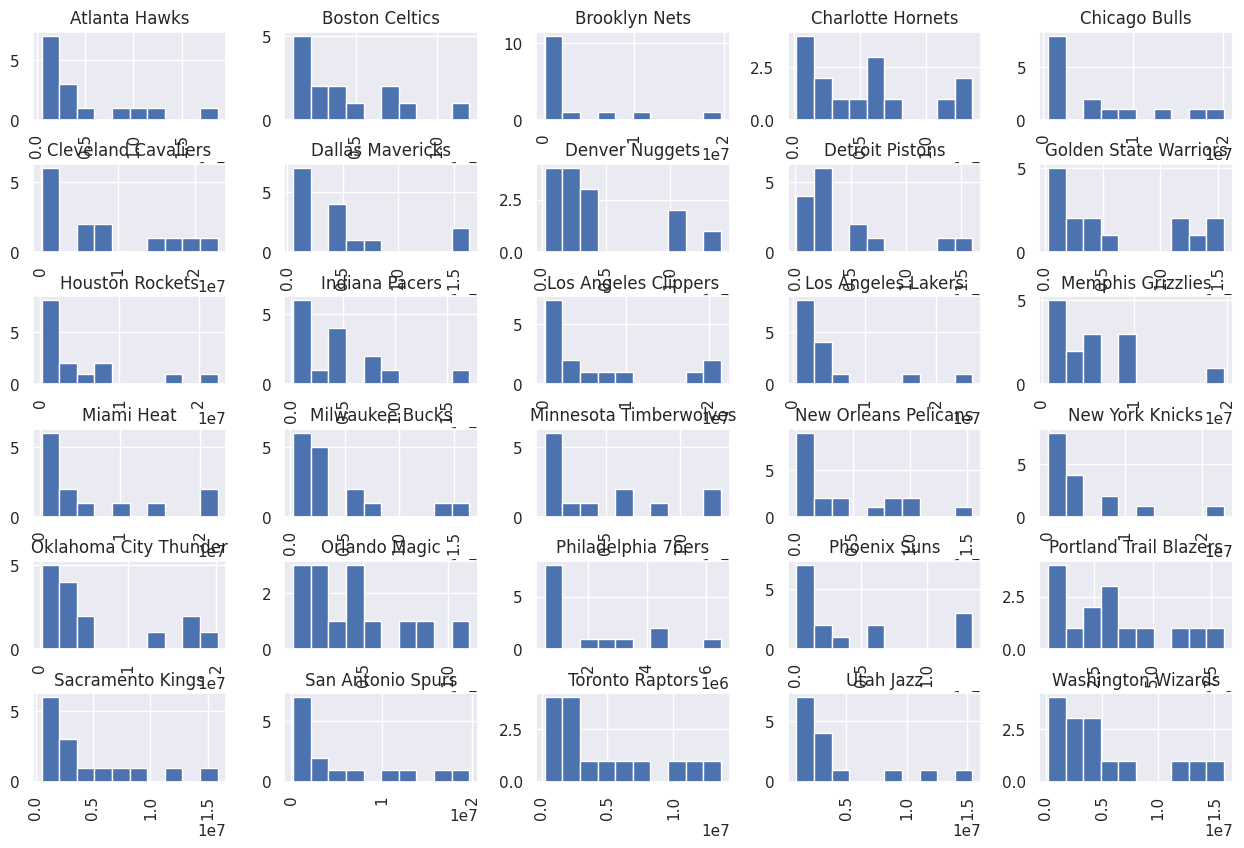

In [70]:
data['Salary'].hist(by=data['Team'], figsize=(15, 10))

### Box plot
Another useful type of visualization is a **box plot**.

In [71]:
data['Salary'].describe()

,Salary
count,4.460000e+02
mean,4.842684e+06
std,5.229238e+06
min,3.088800e+04
25%,1.044792e+06
50%,2.839073e+06
75%,6.500000e+06
max,2.500000e+07


{'whiskers': [<matplotlib.lines.Line2D at 0x7d6a4cea0a40>,
 'caps': [<matplotlib.lines.Line2D at 0x7d6a4ce36000>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d6a4cea3620>],
 'medians': [<matplotlib.lines.Line2D at 0x7d6a4cf9bb60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d6a4ced0770>],
 'means': []}

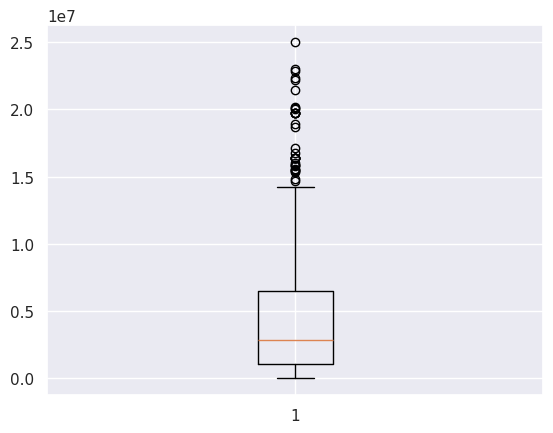

In [72]:
# Creating plot
plt.boxplot(data['Salary'].dropna())

Let's see how to interpret a box plot. Its components are a box (obviously, this is why it is called a box plot), the so-called whiskers, and a number of individual points (outliers).

**Median**
The median (middle quartile) marks the mid-point of the data and is shown by the line that divides the box into two parts. Half the scores are greater than or equal to this value and half are less.

**Inter-quartile range (IQR)**
The middle “box” represents the middle 50% of scores for the group. The range of scores from lower to upper quartile is referred to as the inter-quartile range. The middle 50% of scores fall within the inter-quartile range.

**Upper quartile (Q3)**
75% of the scores fall below the upper quartile or 25%  of scores are greater than this value.

**Lower quartile (Q1)**
25% of scores fall below the lower quartile or 75% os scores are less than this value.

**Whiskers (maximum and minimum)**
The upper and lower whiskers represent scores outside the middle 50%. Whiskers often (but not always) stretch over a wider range of scores than the middle quartile groups.

**Outliers** that fall out of the range bounded by the whiskers are plotted individually as black points along the central axis.

<img src = 'https://cdn-images-1.medium.com/max/800/1*2c21SkzJMf3frPXPAR_gZA.png'>

### Frequency table

Let’s check the class balance in our dataset by looking at the distribution of the categorical variables. First, we will get a frequency table, which shows how frequent each value of the categorical variable is. For this, we will use the `value_counts()`:

In [73]:
data['Position'].value_counts()

,count
Position,
SG,102
PF,100
PG,92
SF,85
C,78


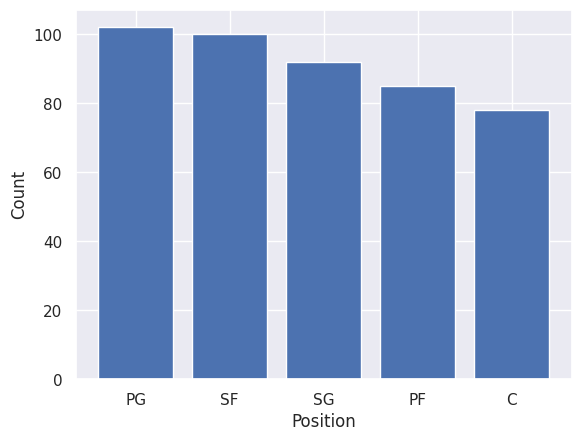

In [74]:
# Create bars
plt.bar(data['Position'].unique(), data['Position'].value_counts())
plt.xlabel("Position")
plt.ylabel("Count")
# Show graphic
plt.show()

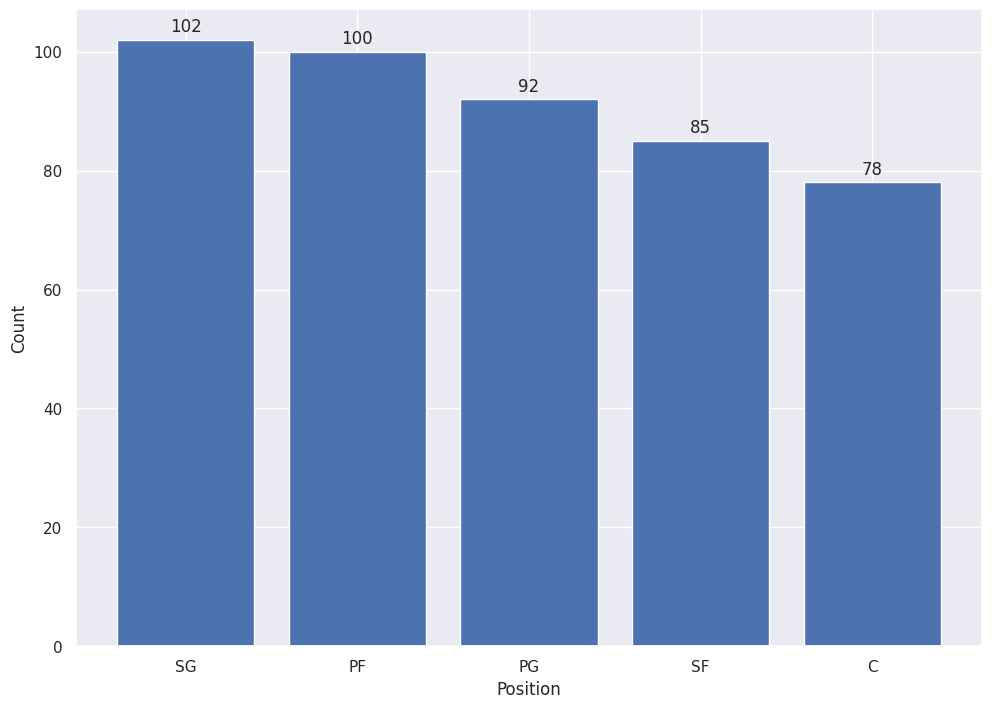

In [76]:
counts = data['Position'].value_counts()

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

bars = ax.bar(counts.index, counts)
ax.set_xlabel("Position")
ax.set_ylabel("Count")
ax.bar_label(bars, padding =3)
plt.show()

While the histograms, discussed above, and bar plots may look similar, there are several differences between them:
- Histograms are best suited for looking at the distribution of numerical variables while bar plots are used for categorical features.
- The values on the X-axis in the histogram are numerical; a bar plot can have any type of values on the X-axis: numbers, strings, booleans.
- The histogram's X-axis is a Cartesian coordinate axis along which values cannot be changed; the ordering of the bars is not predefined. Still, it is useful to note that the bars are often sorted by height, that is, the frequency of the values. Also, when we consider ordinal variables, the bars are usually ordered by variable value.

### Multivariate visualization
Multivariate plots allow us to see relationships between two and more different variables, all in one figure. Just as in the case of univariate plots, the specific type of visualization will depend on the types of the variables being analyzed.

#### Quantitative–Quantitative

#### Correlation matrix
Let's look at the correlations among the numerical variables in our dataset. This information is important to know as there are Machine Learning algorithms (for example, linear and logistic regression) that do not handle highly correlated input variables well.

First, we will use the method `corr()` that we also used previously on a DataFrame that calculates the correlation between each pair of features. Then, we pass the resulting correlation matrix to `heatmap()`, which renders a color-coded matrix for the provided values:

In [ ]:
# calulcate correlation matrix
numeric_col = ['Age', 'Weight', 'Salary']
corr = data[numeric_col].corr()
corr

,Age,Weight,Salary
Age,1.000000,0.087183,0.213459
Weight,0.087183,1.000000,0.138321
Salary,0.213459,0.138321,1.000000


A heatmap is a graphical representation of data where each value of a matrix is represented as a color. If you're in a rush and want to make a heatmap with Python as quick as possible, use the `heatmap()` function of Seaborn

<Axes: >

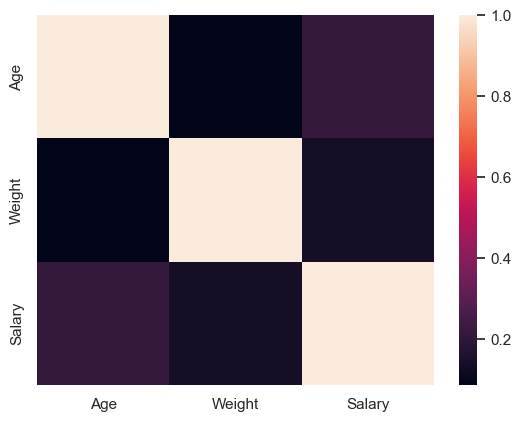

In [ ]:
sns.heatmap(corr)

#### Scatter plot
The scatter plot displays values of two numerical variables as Cartesian coordinates in 2D space. Scatter plots in 3D are also possible.

Let's try out the function `scatter()` from the matplotlib library:

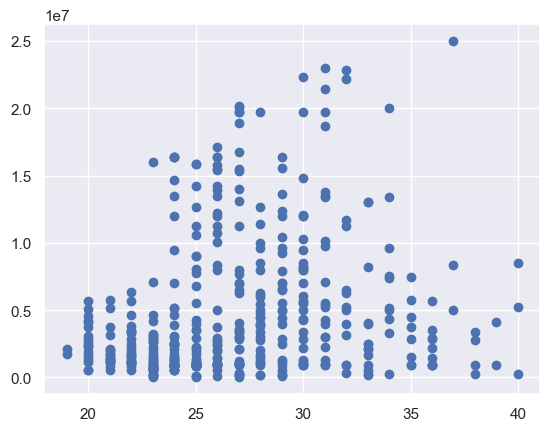

In [ ]:
plt.scatter(data['Age'], data['Salary'])

There is a slightly fancier option to create a scatter plot with the seaborn library:

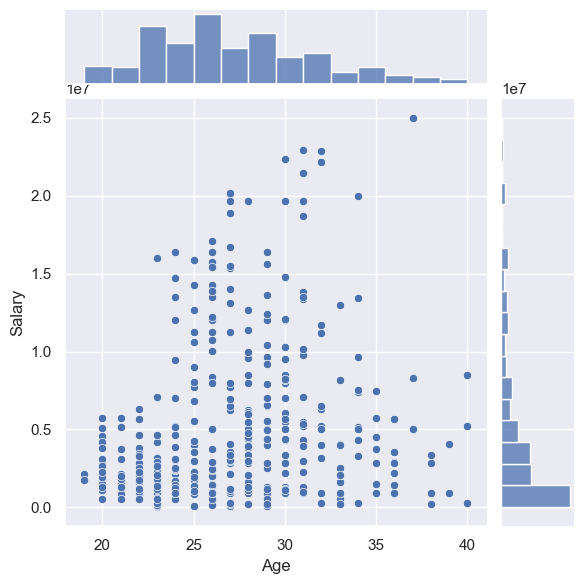

In [ ]:
sns.jointplot(x='Age', y='Salary',
              data=data, kind='scatter')

The function jointplot() plots two histograms that may be useful in some cases.

Using the same function, we can also get a smoothed version of our bivariate distribution:

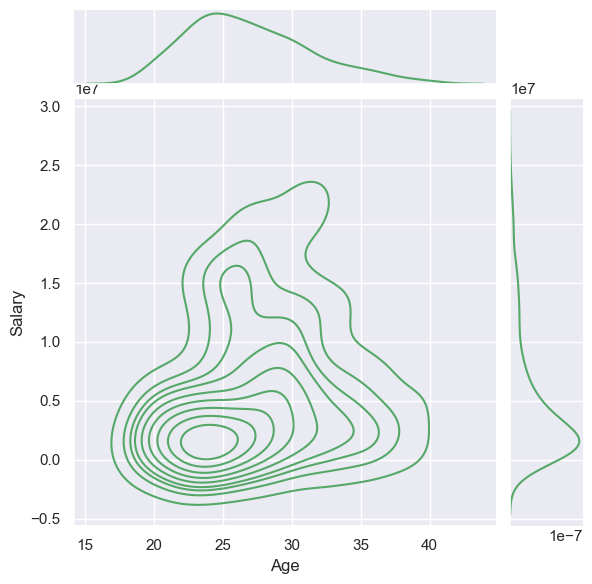

In [ ]:
sns.jointplot(x='Age', y='Salary', data=data,
              kind="kde", color="g")

This is basically a bivariate version of the Kernel Density Plot discussed earlier.

#### Quantitative–Categorical

Let's see how the Team variable is related to Salary

Previously, you learned about scatter plots. Additionally, their points can be color or size coded so that the values of a third categorical variable are also presented in the same figure. We can achieve this with the scatter() function seen above, but, let's try a new function called lmplot() and use the parameter hue to indicate our categorical feature of interest:

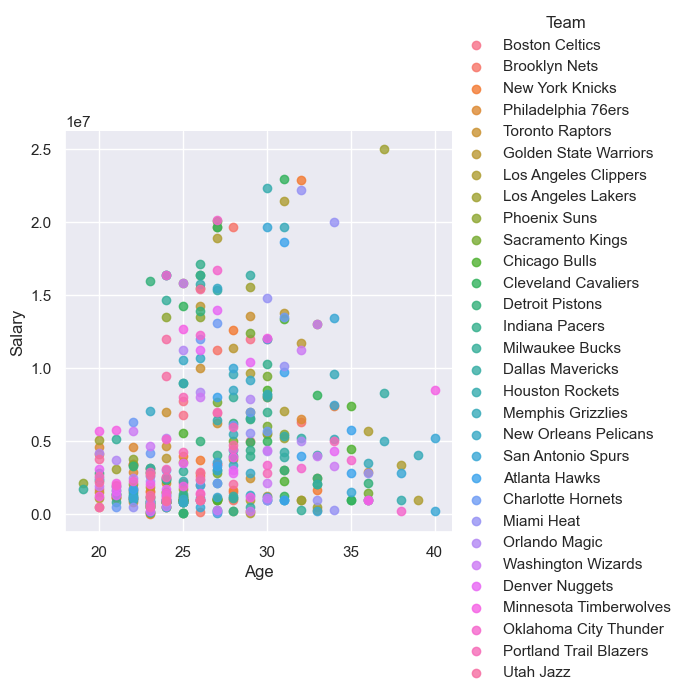

In [ ]:
sns.lmplot(x='Age', y='Salary', data=data, hue='Team', fit_reg=False)

Now, let’s create box plots to visualize the distribution statistics of the numerical variables in groups by positions

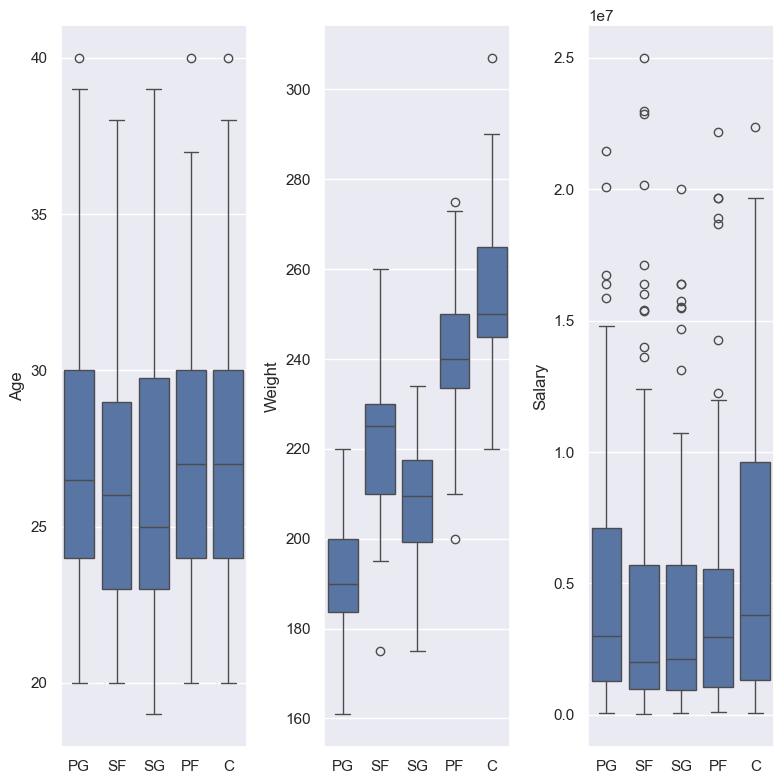

In [ ]:
# create space for subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 8))
# idx = 1, 2, 3, feature = Age, Weight, Salary
for idx, feature in enumerate(numeric_col):
    ax = axes[idx]
    sns.boxplot(x='Position', y=feature, data=data, ax = ax )
    ax.set_xlabel('')
    ax.set_ylabel(feature)
fig.tight_layout()

PG (point guard), SF (small forward), SG (shooting guard), PF (power forward) and C (center)

####  Categorical–Categorical

Let's look at the distribution of the Height, again using a count plot. This time, let's also pass the parameter hue=Position that adds a categorical dimension to the plot:

<Axes: xlabel='Height', ylabel='count'>

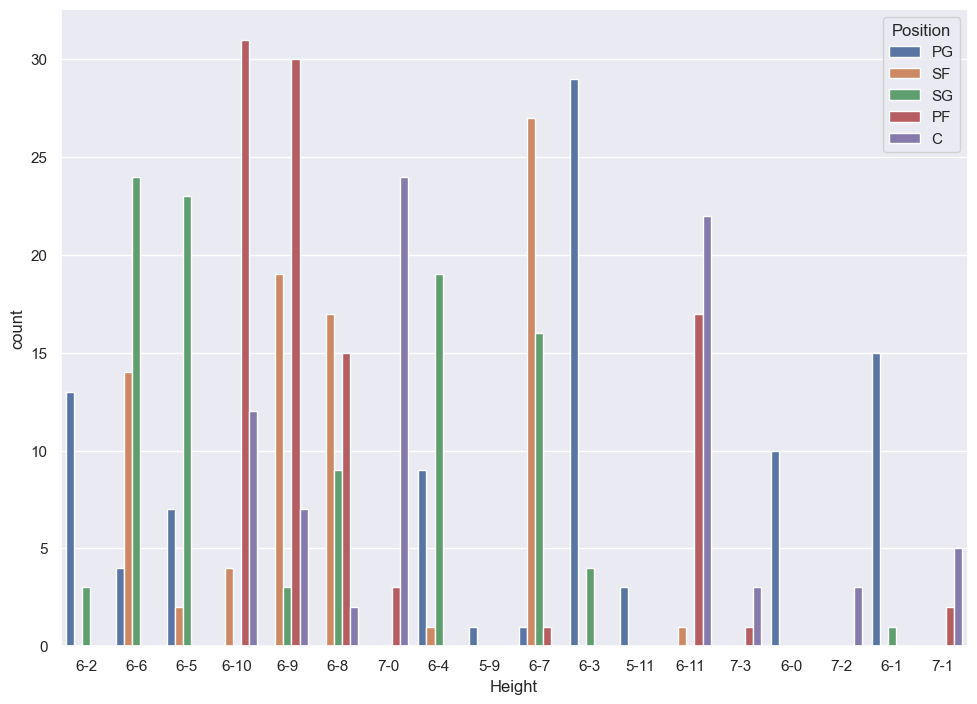

In [ ]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot(x='Height', hue='Position', data=data)

In the plot above we can see players position distribution against their height. However, it is slightly difficult to evaluate the data from the figure due to a random order of the height feature (as it is a categoric, it is shown by the principle of the first value it meets). To make the plot more intuitive, there are two other approaches - to sort height values (alphabetical order) or to can covert the height data from categorical to numeric. This time we'll sort the height values.

<Axes: xlabel='Height', ylabel='count'>

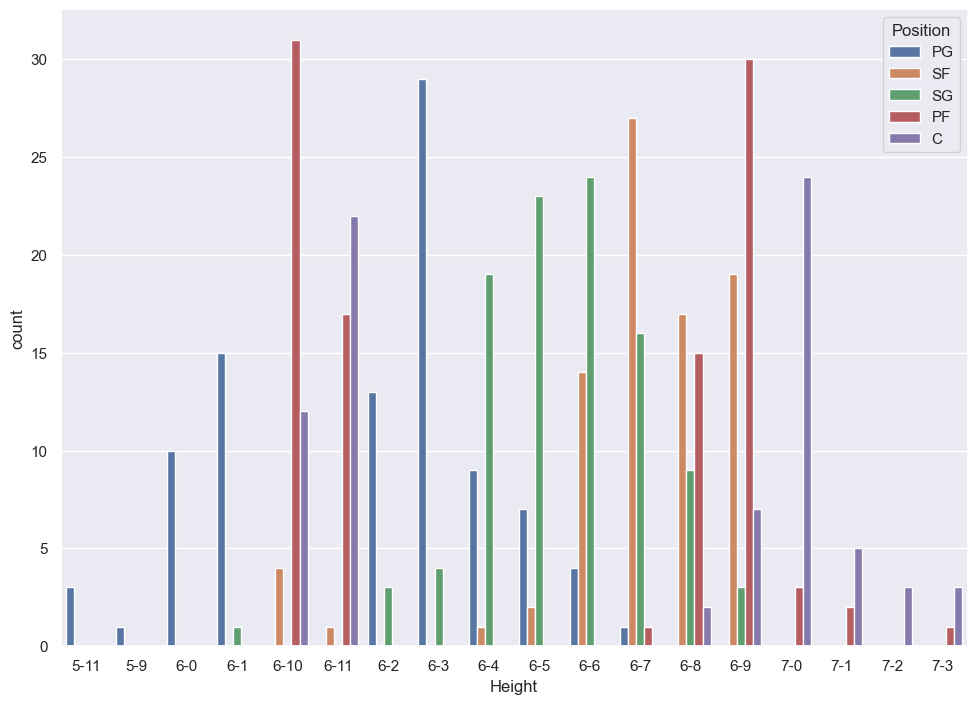

In [ ]:
order_list = sorted(data['Height']. unique())

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot(x='Height', hue='Position', data=data, order=order_list)

#### Contingency table
In addition to using graphical means for categorical analysis, there is a traditional tool from statistics: a contingency table, also called a cross tabulation. It represents multivariate frequency distribution of categorical variables in tabular form. In particular, it allows us to see the distribution of one variable conditional on the other by looking along a column or row.

Let's try to see how Position is related to the variable Height by creating a cross tabulation:

In [ ]:
pd.crosstab(data['Height'], data['Position']).T

Height,5-11,5-9,6-0,6-1,6-10,6-11,6-2,6-3,6-4,6-5,6-6,6-7,6-8,6-9,7-0,7-1,7-2,7-3
Position,,,,,,,,,,,,,,,,,,
C,0,0,0,0,12,22,0,0,0,0,0,0,2,7,24,5,3,3
PF,0,0,0,0,31,17,0,0,0,0,0,1,15,30,3,2,0,1
PG,3,1,10,15,0,0,13,29,9,7,4,1,0,0,0,0,0,0
SF,0,0,0,0,4,1,0,0,1,2,14,27,17,19,0,0,0,0
SG,0,0,0,1,0,0,3,4,19,23,24,16,9,3,0,0,0,0


### KEEP IN MIND
- Choose the appropriate plot type. If there are various options, you can try to compare them, and choose the one that fits model the best.
- When you choose your type of plot, one of the most important things is to label your axis.
- Add a title to make plot more informative.
- Add labels for different categories when needed.
- Optionally you can add a text or an arrow at interesting data points.
- In some cases you can use some sizes and colors of the data to make the plot more informative.

<img src = 'https://cdn-images-1.medium.com/max/800/1*JxbqIQmD_E3M3I7Tjo0OqA.jpeg'>

Useful site with a lot of examples:  https://www.python-graph-gallery.com/boxplot/

## Feature engineering
[Return to Table of Contents](#Table-of-Contents)
***

Feature Engineering is the process of creating new features (variables) that could improve the performance of your machine learning model. This often involves:

- **Combining existing features** (e.g., creating a BMI feature)
- **Transforming variables** (e.g., converting a continuous feature into a categorical one)

### Transforming variables

We can start by transforming height to a numerical variable.

In [ ]:
data['Height'] = pd.to_numeric(data['Height'].replace('-', '.', regex=True))
data['Height']

0      6.2
1      6.6
2      6.5
3      6.5
4      6.1
      ... 
452    6.1
453    6.3
454    6.1
455    7.3
456    7.0
Name: Height, Length: 457, dtype: float64

Now we need to convert both height and weight to the metric system.

To convert feet to meters, you can use a simple conversion factor. One foot is equal to 0.3048 meters. Therefore, to convert a measurement in feet to meters, you need to multiply the number of feet by 0.3048.

One pound is equal to approximately 0.453592 kilograms. This means that to convert pounds to kilograms, you simply need to multiply the number of pounds by 0.453592 to get the equivalent weight in kilograms.

In [ ]:
data["Height"] = data["Height"] * 0.3048
data["Weight"] = data["Weight"] * 0.453592
data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,1.88976,81.646560,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,2.01168,106.594120,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,1.98120,92.986360,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,1.98120,83.914520,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,1.85928,104.779752,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,1.85928,106.140528,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,1.92024,92.079176,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,1.85928,81.192968,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,2.22504,116.119552,NaN,2900000.0


Additionally it's possible to encode categorical variables as numerical values. It transforms non-numeric categorical data into a format that can be understood and processed by machine learning algorithms

In [ ]:
lb_make = LabelEncoder()
data['Position_enc'] = lb_make.fit_transform(data['Position'])
data[['Position_enc', 'Position']].head()

,Position_enc,Position
0,2,PG
1,3,SF
2,4,SG
3,4,SG
4,1,PF


### Polynomial features

Polynomial features are created by raising existing features to a power or by combining features through multiplication. This is often done to capture non-linear relationships between features and the target variable in a dataset. They're often used in machine learning algorithms that benefit from feature transformations, such as polynomial regression. In this example we'll use this feature to calculate BMI.

In [ ]:
data["Height_m^2"] = data["Height"] * data["Height"]
data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Position_enc,Height_m^2
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,1.88976,81.646560,Texas,7730337.0,2,3.571193
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,2.01168,106.594120,Marquette,6796117.0,3,4.046856
2,John Holland,Boston Celtics,30.0,SG,27.0,1.98120,92.986360,Boston University,NaN,4,3.925153
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,1.98120,83.914520,Georgia State,1148640.0,4,3.925153
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,1.85928,104.779752,NaN,5000000.0,1,3.456922
...,...,...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,1.85928,106.140528,Kentucky,2239800.0,1,3.456922
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,1.92024,92.079176,Butler,2433333.0,2,3.687322
454,Raul Neto,Utah Jazz,25.0,PG,24.0,1.85928,81.192968,NaN,900000.0,2,3.456922
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,2.22504,116.119552,NaN,2900000.0,0,4.950803


### Combining features

Now we can calculate a new feature based on the previously transformed features - BMI for each player.

BMI = weight (kg) ÷ height (m²)

In [ ]:
data["BMI"] = data["Weight"] / data["Height_m^2"]
data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Position_enc,Height_m^2,BMI
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,1.88976,81.646560,Texas,7730337.0,2,3.571193,22.862546
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,2.01168,106.594120,Marquette,6796117.0,3,4.046856,26.339981
2,John Holland,Boston Celtics,30.0,SG,27.0,1.98120,92.986360,Boston University,NaN,4,3.925153,23.689866
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,1.98120,83.914520,Georgia State,1148640.0,4,3.925153,21.378660
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,1.85928,104.779752,NaN,5000000.0,1,3.456922,30.310128
...,...,...,...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,1.85928,106.140528,Kentucky,2239800.0,1,3.456922,30.703766
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,1.92024,92.079176,Butler,2433333.0,2,3.687322,24.971832
454,Raul Neto,Utah Jazz,25.0,PG,24.0,1.85928,81.192968,NaN,900000.0,2,3.456922,23.487069
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,2.22504,116.119552,NaN,2900000.0,0,4.950803,23.454690


Let's drop the features we don't need anymore.

### Binning

Data binning or bucketing is a data preprocessing method used to minimize the effects of small observation errors. The original data values are divided into small intervals known as bins and then they are replaced by a general value calculated for that bin. This has a smoothing effect on the input data and may also reduce the chances of overfitting in the case of small datasets.

We can map age into age groups. To do that we need to create bins and group names.

In [ ]:
bins = [19, 24, 30, 35, np.inf] # np.inf represents floating-point positive infinity
names = ['19-23', '24-29', '30-34', '35-40']
data['AgeRange'] = pd.cut(data['Age'], bins, labels=names)
data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Position_enc,Height_m^2,BMI,AgeRange
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,1.88976,81.646560,Texas,7730337.0,2,3.571193,22.862546,24-29
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,2.01168,106.594120,Marquette,6796117.0,3,4.046856,26.339981,24-29
2,John Holland,Boston Celtics,30.0,SG,27.0,1.98120,92.986360,Boston University,NaN,4,3.925153,23.689866,24-29
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,1.98120,83.914520,Georgia State,1148640.0,4,3.925153,21.378660,19-23
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,1.85928,104.779752,NaN,5000000.0,1,3.456922,30.310128,24-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,1.85928,106.140528,Kentucky,2239800.0,1,3.456922,30.703766,19-23
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,1.92024,92.079176,Butler,2433333.0,2,3.687322,24.971832,24-29
454,Raul Neto,Utah Jazz,25.0,PG,24.0,1.85928,81.192968,NaN,900000.0,2,3.456922,23.487069,19-23
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,2.22504,116.119552,NaN,2900000.0,0,4.950803,23.454690,24-29


We can use these groups to get more insights by creating another count plot to see which age group has te most players.

<Axes: xlabel='AgeRange', ylabel='count'>

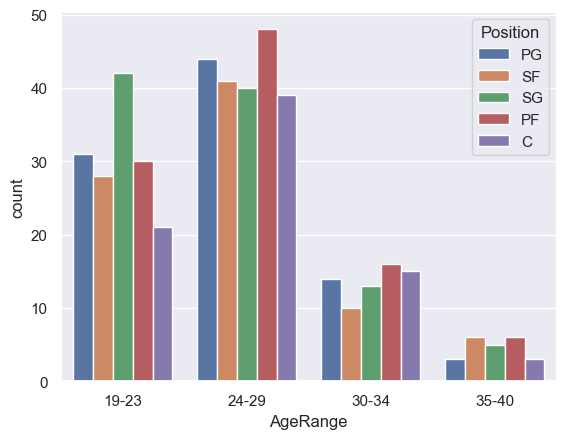

In [ ]:
sns.countplot(x='AgeRange', hue='Position', data=data)


### Dummy variables and One-Hot Encodings

This topic is particularly useful when you want to be able to convert some categorical data into numerical values so that you can use it in your data analysis model. This is particularly handy, especially when doing machine learning modeling, where the concept of one-hot encoding is famous. Using more technical words: one-hot encoding is the process of converting categorical values into a 1-dimensional numerical vector.

One way of doing this using pandas is to use the `get_dummies()` function. If a column in your dataframe has 'n' distinct values, the function will derive a matrix with 'n' columns containing all 1s and 0s. Let's see this with an example to grasp the concept better.

In [ ]:
# let's check original 'Position' column data
data[['Position']]

,Position
0,PG
1,SF
2,SG
3,SG
4,PF
...,...
452,PF
453,PG
454,PG
455,C


In [ ]:
# create dummies
pd.get_dummies(data['Position'])

,C,PF,PG,SF,SG
0,False,False,True,False,False
1,False,False,False,True,False
2,False,False,False,False,True
3,False,False,False,False,True
4,False,True,False,False,False
...,...,...,...,...,...
452,False,True,False,False,False
453,False,False,True,False,False
454,False,False,True,False,False
455,True,False,False,False,False


`scikit-learn` also supports one hot encoding via `LabelBinarizer` and `OneHotEncoder` in its `preprocessing` module. Just for the sake of practicing let's do the same encoding via `LabelBinarizer`:


In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(data['Position'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
lb_results_df

,C,PF,PG,SF,SG
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,0,0,1
4,0,1,0,0,0
...,...,...,...,...,...
452,0,1,0,0,0
453,0,0,1,0,0
454,0,0,1,0,0
455,1,0,0,0,0


However, this is a simple example to help you get started. In real world applications the membership of a character can belong to various categories at the same time, thus you will have to learn more sophisticated methods. Also one-hot encoding solves the problem of unequal weights given to categories within a feature, it is not very useful when there are many categories, as that will result in formation of as many new columns, which can result in the curse of dimensionality. The concept of the “curse of dimensionality” discusses that in high-dimensional spaces some things just stop working properly.

### Feature selection

Once you have all your features, the next step is Feature selection. This is the process of selecting the most important features to use in your model. Why? Because using irrelevant or redundant features can reduce the model’s performance.

We can look at the correlation with the target variable now when we have some new useful features.


In [ ]:
df_corr = data[['Number', 'Age', 'Height', 'Weight', 'BMI', 'Position_enc', 'Salary']]

correlation_with_target = df_corr.corr()['Salary'].drop('Salary')

correlation_with_target

Number         -0.112386
Age             0.213459
Height         -0.035906
Weight          0.138321
BMI             0.143250
Position_enc   -0.094926
Name: Salary, dtype: float64

As we already previously discovered, age has the strongest positive correlation with `Salary`, nut it's still quite weak. Additionally, we can definitely drop `Height`, since it would not add any value to further analysis regarding the `Salary`.

### Date extraction

Data often includes date and time related variables, but often we don't need the full date, so there're plenty of methods how to extract features form date in Python. This is commonly done in data preprocessing to create new features that can be used in machine learning models.

In [ ]:
# Sample dataset with a date column
date_data = {'date': ['2023-11-01', '2023-11-02', '2023-11-03']}
df = pd.DataFrame(date_data)

# Convert the 'date' column to a datetime object
df['date'] = pd.to_datetime(df['date'])

# Extract features from the date
df['year'] = df['date'].dt.year          # Extract year
df['month'] = df['date'].dt.month        # Extract month
df['day'] = df['date'].dt.day            # Extract day
df['day_of_week'] = df['date'].dt.dayofweek  # Extract day of the week (0=Monday, 6=Sunday)
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # Weekend flag
df['quarter'] = df['date'].dt.quarter    # Extract quarter
df['day_of_year'] = df['date'].dt.dayofyear  # Extract day of the year

# Display the resulting DataFrame
df

,date,year,month,day,day_of_week,is_weekend,quarter,day_of_year
0,2023-11-01,2023,11,1,2,0,4,305
1,2023-11-02,2023,11,2,3,0,4,306
2,2023-11-03,2023,11,3,4,0,4,307
